<a href="https://colab.research.google.com/github/InduwaraGayashan001/TensorFlow/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [2]:
!pip install tensorflow

In [5]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

# Load Data

In [7]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)
(404,)
(102, 13)
(102,)


# Extract Features

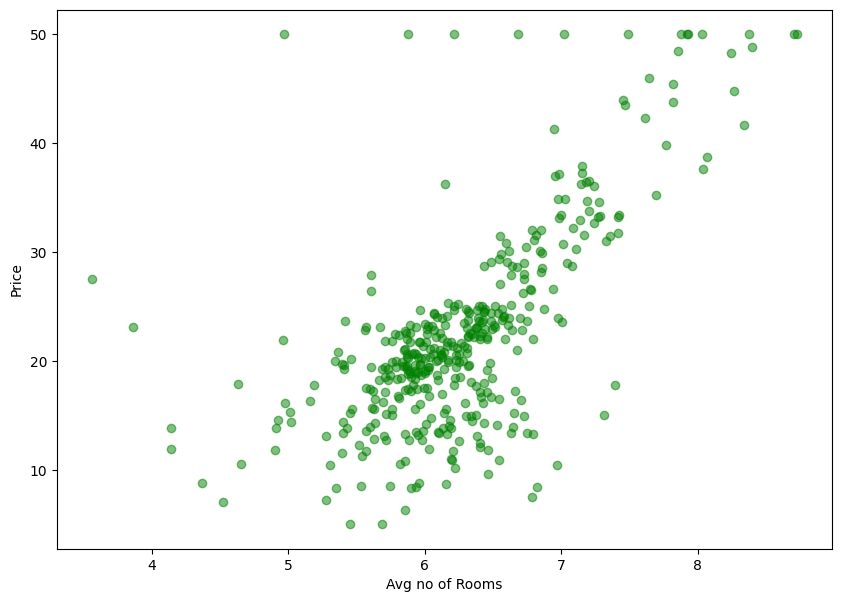

In [9]:
X_train_1d = X_train[:, 5]
X_test_1d = X_test[:, 5]

plt.figure(figsize=(10, 7))
plt.xlabel("Avg no of Rooms")
plt.ylabel("Price")
plt.scatter(X_train_1d[:], y_train, color="green", alpha=0.5)
plt.show()

# Linear Regression Model

In [10]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

# Train Model

In [12]:
history = model.fit(X_train_1d, y_train, epochs=101, validation_split=0.3)

Epoch 1/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 291.2004 - val_loss: 388.0698
Epoch 2/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 276.0063 - val_loss: 375.1591
Epoch 3/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 265.4950 - val_loss: 363.6666
Epoch 4/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 255.9729 - val_loss: 352.7646
Epoch 5/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 246.9106 - val_loss: 342.2105
Epoch 6/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 238.1457 - val_loss: 331.9189
Epoch 7/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 229.6203 - val_loss: 321.8579
Epoch 8/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 221.3126 - val_loss: 312.0152
Epoch 9/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 213.2142 - val_loss: 302.3860
Epoch 10/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 205.3216 - val_loss: 292.9683
Epoch 11/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 197.6336 - val_loss: 283.7614
Epoch 12/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

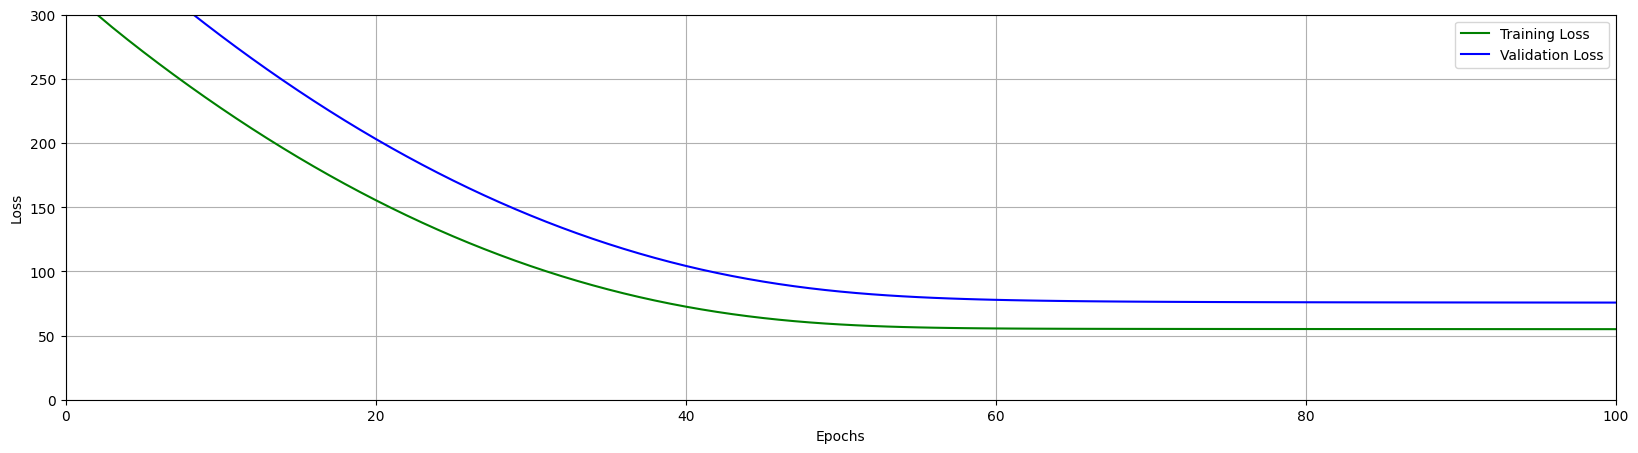

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], 'g', label = 'Training Loss')
plt.plot(history.history['val_loss'], 'b', label = 'Validation Loss')
plt.xlim([0, 100])
plt.ylim([0, 300])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Predictions

In [16]:
x = np.array([3,4,5,6,7])
y_pred = model.predict(x)
for i in range(len(x)):
  predicted_price = y_pred[i].item()
  print(f"Predicted price of a home with {x[i]} rooms: ${int(predicted_price * 10) / 10}K")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted price of a home with 3 rooms: $11.7K
Predicted price of a home with 4 rooms: $14.9K
Predicted price of a home with 5 rooms: $18.1K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.6K


# Plot the model and data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


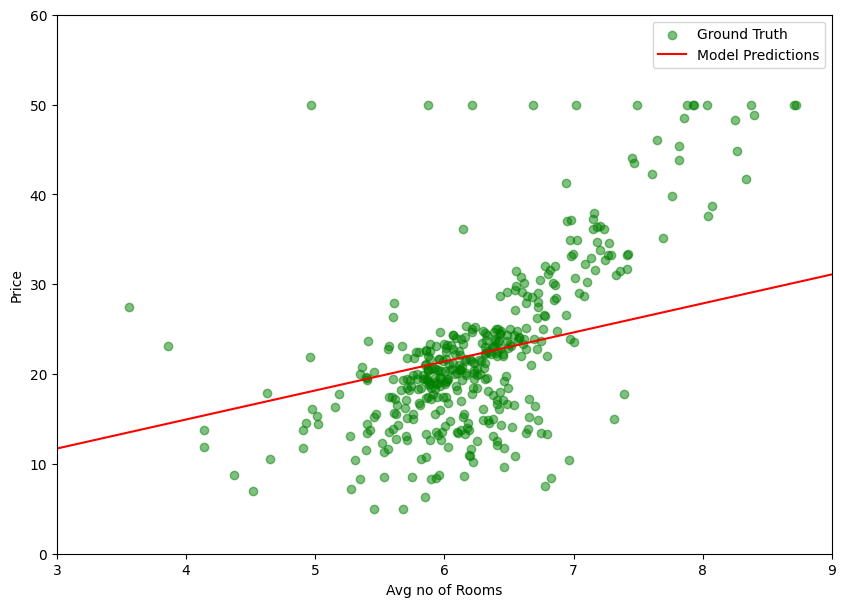

In [18]:
x = np.linspace(3,9,10)
y = model.predict(x)

plt.figure(figsize=(10, 7))
plt.xlabel("Avg no of Rooms")
plt.ylabel("Price")
plt.xlim([3, 9])
plt.ylim([0, 60])
plt.scatter(X_train_1d[:], y_train, color="green", label= 'Ground Truth',alpha=0.5)
plt.plot(x, y, color='red', label='Model Predictions')
plt.legend()
plt.show()


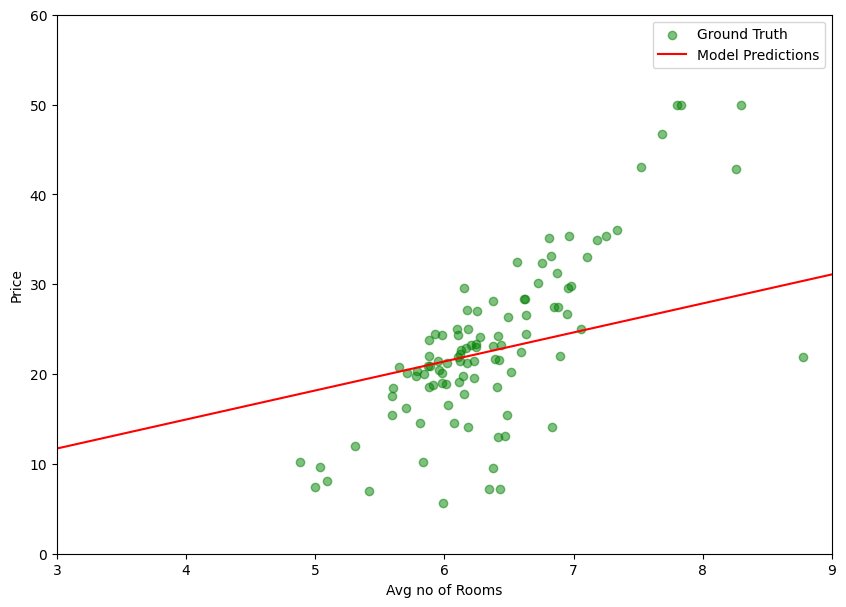

In [19]:
plt.figure(figsize=(10, 7))
plt.xlabel("Avg no of Rooms")
plt.ylabel("Price")
plt.xlim([3, 9])
plt.ylim([0, 60])
plt.scatter(X_test_1d[:], y_test, color="green", label= 'Ground Truth',alpha=0.5)
plt.plot(x, y, color='red', label='Model Predictions')
plt.legend()
plt.show()